In [1]:
import gym
import itertools
import matplotlib
import matplotlib.style
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt

from collections import defaultdict
from lib.envs.windy_gridworld import WindyGridworldEnv
from lib import plotting

matplotlib.style.use('ggplot')


In [2]:
env = WindyGridworldEnv()


def createEpsilonGreedyPolicy(Q, epsilon, num_actions):
	"""
	Creates an epsilon-greedy policy based
	on a given Q-function and epsilon.
	
	Returns a function that takes the state
	as an input and returns the probabilities
	for each action in the form of a numpy array
	of length of the action space(set of possible actions).
	"""
	def policyFunction(state):

		Action_probabilities = np.ones(num_actions,
				dtype = float) * epsilon / num_actions
				
		best_action = np.argmax(Q[state])
		Action_probabilities[best_action] += (1.0 - epsilon)
		return Action_probabilities

	return policyFunction


In [3]:
def qLearning(env, num_episodes, discount_factor = 1.0,
							alpha = 0.6, epsilon = 0.1):
	"""
	Q-Learning algorithm: Off-policy TD control.
	Finds the optimal greedy policy while improving
	following an epsilon-greedy policy"""
	
	# Action value function
	# A nested dictionary that maps
	# state -> (action -> action-value).
	Q = defaultdict(lambda: np.zeros(env.action_space.n))

	# Keeps track of useful statistics
	stats = plotting.EpisodeStats(
		episode_lengths = np.zeros(num_episodes),
		episode_rewards = np.zeros(num_episodes))	
	
	# Create an epsilon greedy policy function
	# appropriately for environment action space
	policy = createEpsilonGreedyPolicy(Q, epsilon, env.action_space.n)
	
	# For every episode
	for ith_episode in range(num_episodes):
		
		# Reset the environment and pick the first action
		state = env.reset()
		
		for t in itertools.count():
			
			# get probabilities of all actions from current state
			action_probabilities = policy(state)

			# choose action according to
			# the probability distribution
			action = np.random.choice(np.arange(
					len(action_probabilities)),
					p = action_probabilities)

			# take action and get reward, transit to next state
			next_state, reward, done, _ = env.step(action)

			# Update statistics
			stats.episode_rewards[ith_episode] += reward
			stats.episode_lengths[ith_episode] = t
			
			# TD Update
			best_next_action = np.argmax(Q[next_state])	
			td_target = reward + discount_factor * Q[next_state][best_next_action]
			td_delta = td_target - Q[state][action]
			Q[state][action] += alpha * td_delta

			# done is True if episode terminated
			if done:
				break
				
			state = next_state
	
	return Q, stats


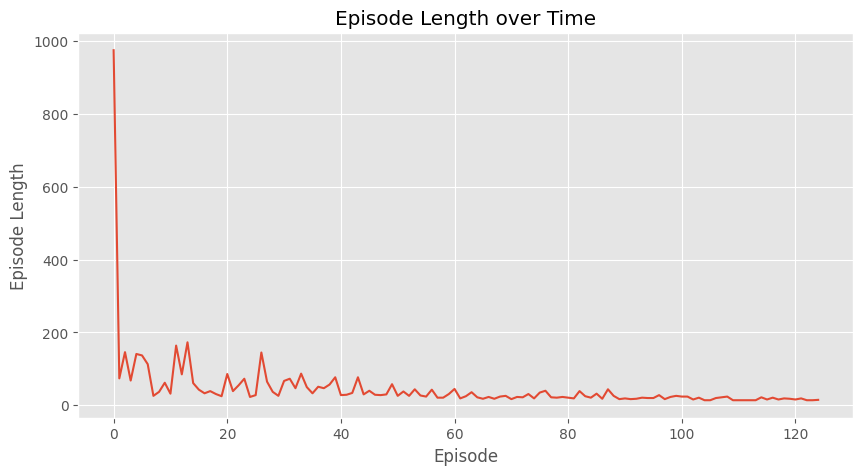

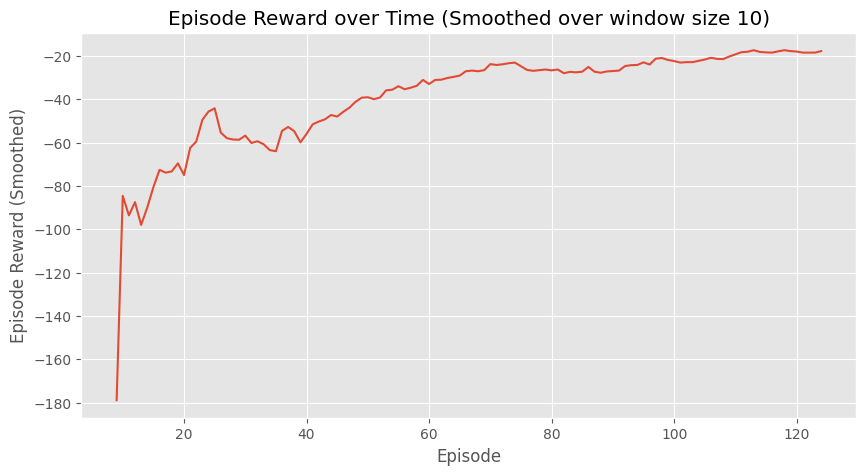

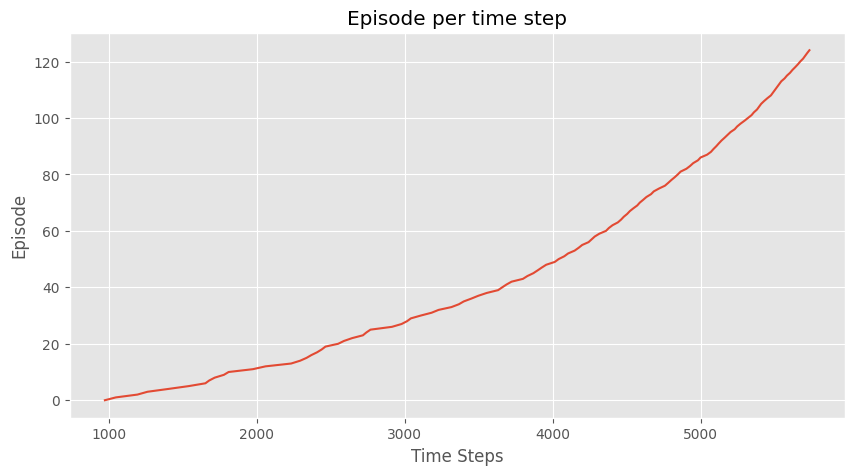

In [4]:
Q, stats = qLearning(env, 125)
plotting.plot_episode_stats(stats)

plt.show()



In [7]:
def sarsaLearning(env, num_episodes, discount_factor = 1.0,
							alpha = 0.6, epsilon = 0.1):
	"""
	SARSA-Learning algorithm: Off-policy TD control.
	Finds the optimal greedy policy while improving
	following an epsilon-greedy policy"""
	
	# Action value function
	# A nested dictionary that maps
	# state -> (action -> action-value).
	Q = defaultdict(lambda: np.zeros(env.action_space.n))

	# Keeps track of useful statistics
	stats = plotting.EpisodeStats(
		episode_lengths = np.zeros(num_episodes),
		episode_rewards = np.zeros(num_episodes))	
	
	# Create an epsilon greedy policy function
	# appropriately for environment action space
	policy = createEpsilonGreedyPolicy(Q, epsilon, env.action_space.n)
	
	# For every episode
	for ith_episode in range(num_episodes):
		


		#  Getting the initial S
		state = env.reset()

		# get probabilities of all actions from current state
		action_probabilities = policy(state)
		
		
		
		# Choose A from S using the policy function


		# choose action according to
		# the probability distribution
		action = np.random.choice(np.arange(
				len(action_probabilities)),
				p = action_probabilities)
		
		for t in itertools.count():
			

			# take action A observer R,S'
			next_state, reward, done, _ = env.step(action)

			
			# Update statistics
			stats.episode_rewards[ith_episode] += reward
			stats.episode_lengths[ith_episode] = t
			
			# choose A' from S' with greedy policy
			next_action = np.random.randint(0,len(Q[next_state]))	
			# TD Update
			td_target = reward + discount_factor * Q[next_state][next_action]
			td_delta = td_target - Q[state][action]
			Q[state][action] += alpha * td_delta

			# done is True if episode terminated
			if done:
				break
				
			# S <- S'
			state = next_state
			# A <- A
			action = next_action 
	
	return Q, stats



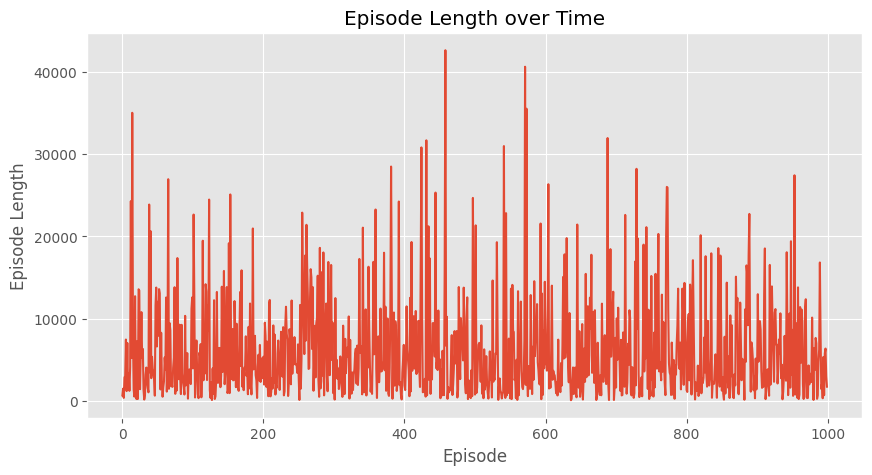

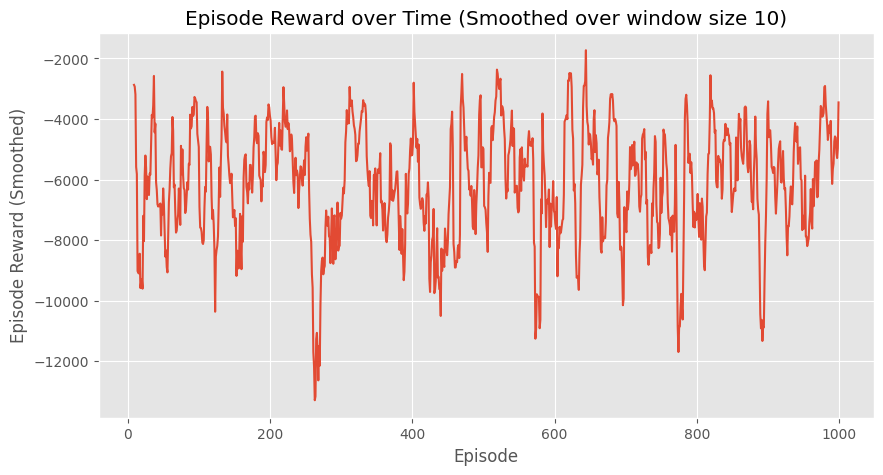

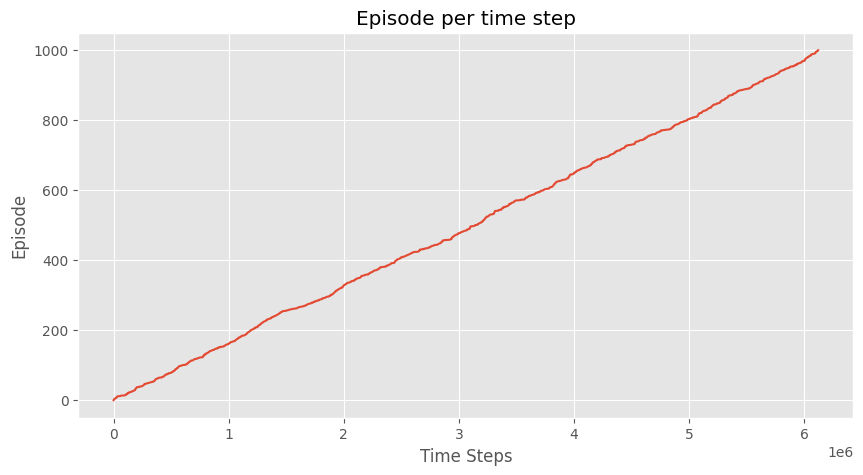

In [9]:
Q, stats = sarsaLearning(env, 1000)
plotting.plot_episode_stats(stats)
plt.show()

Although the next action of the agent in SARSA is not chosen greedily, it seems to me it has a quicker convergence to higher rewards.